In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm, metrics
import datetime as dt

import wfdb

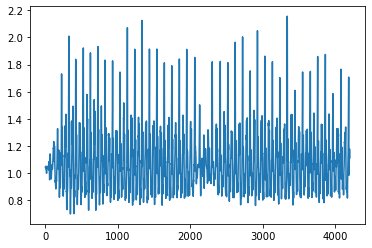

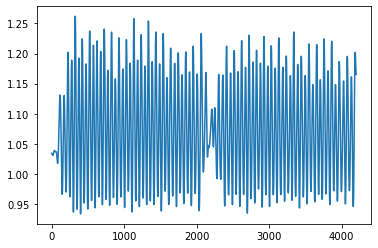

In [4]:
allData = []
label = [];

for i in range(45):

    index = '{:03}'.format(i)
    fileName = 'LabWalks/co' + index + '_base'
    if os.path.isfile(fileName + '.hea'):
        record = wfdb.rdrecord(fileName)
        data = record.p_signal
        tmp = np.linalg.norm(data[:,0:3],axis=1)
        #print(np.size(tmp))
        allData.append(tmp)
        label.append(0)
    
    index = '{:03}'.format(i)
    fileName = 'LabWalks/fl' + index + '_base'
    if os.path.isfile(fileName + '.hea'):
        record = wfdb.rdrecord(fileName)
        data = record.p_signal
        tmp = np.linalg.norm(data[:,0:3],axis=1)
        #print(np.size(tmp))
        allData.append(tmp)
        label.append(1)

        
X_train, X_test, y_train, y_test = train_test_split(
    allData, label, test_size=0.2,random_state=42)

plt.plot(allData[3])
plt.figure()
a = gaussian_filter(allData[3], sigma = 10)
plt.plot(a)

(2491, 1000) (2491,)


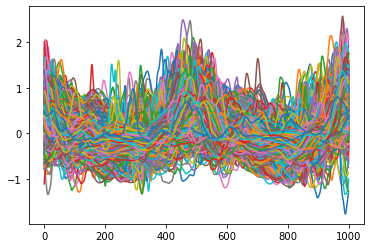

In [5]:
SkipedCycles = 3
NumOfCycles = 40
NumOfSamples = 1000

X_t = []
y_t = []

alldata = X_train
numItems = -1
for one in alldata:
    numItems = numItems + 1;
    pdata = one - 1
    scaler = np.sort(pdata)[int(len(pdata)*0.98)]
    scaledData = pdata / scaler
    filterdData = gaussian_filter(scaledData, sigma = 20)

    index = 0
    #plt.figure()
    for i in range(SkipedCycles):
        while index + 1 < len(one):
            index = index + 1
            if filterdData[index] > max(filterdData[index-1], filterdData[index+1]):
                break;
    index = index + 1;
    while index + 1 < len(one):
        startIndex = index
        #print(startIndex)
        while index + 1 < len(one) and filterdData[index] < max(filterdData[index-1], filterdData[index+1]):
            index = index + 1
        index = index + 1
        endIndex = index  
        
        while index + 1 < len(one) and filterdData[index] < max(filterdData[index-1], filterdData[index+1]):
            index = index + 1
        index = index + 1
        endIndex = index 
        #print(endIndex)

        if endIndex < len(one) - 1:
            usedData = scaledData[startIndex: endIndex]
            f = interp1d(range(len(usedData)), usedData, kind='cubic')
            x = np.linspace(0, len(usedData)-1, num=NumOfSamples, endpoint=False)
            processedData = f(x)
            #plt.plot(processedData)
            X_t.append(processedData)
            y_t.append(y_train[numItems]) 

print(np.shape(X_t), np.shape(y_t))
plt.plot(np.array(X_t).T)
plt.show()

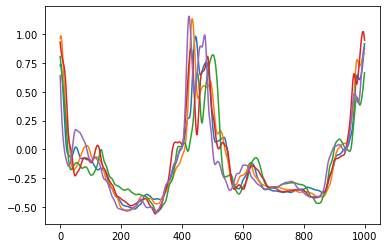

In [9]:
plt.plot(np.array(X_t).T[:,0:5])
plt.show()

(591, 1000) (591,)


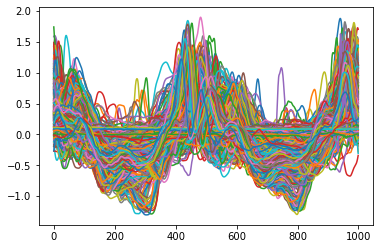

In [10]:
SkipedCycles = 3
NumOfCycles = 40
NumOfSamples = 1000

X_ts = []
y_ts = []

alldata = X_test
numItems = -1
for one in alldata:
    numItems = numItems + 1;
    pdata = one - 1
    scaler = np.sort(pdata)[int(len(pdata)*0.98)]
    scaledData = pdata / scaler
    filterdData = gaussian_filter(scaledData, sigma = 20)

    index = 0
    #plt.figure()
    for i in range(SkipedCycles):
        while index + 1 < len(one):
            index = index + 1
            if filterdData[index] > max(filterdData[index-1], filterdData[index+1]):
                break;
    index = index + 1;
    while index + 1 < len(one):
        startIndex = index
        #print(startIndex)
        while index + 1 < len(one) and filterdData[index] < max(filterdData[index-1], filterdData[index+1]):
            index = index + 1
        index = index + 1
        endIndex = index  
        
        while index + 1 < len(one) and filterdData[index] < max(filterdData[index-1], filterdData[index+1]):
            index = index + 1
        index = index + 1
        endIndex = index  
        #print(endIndex)

        if endIndex < len(one) - 1:
            usedData = scaledData[startIndex: endIndex]
            f = interp1d(range(len(usedData)), usedData, kind='cubic')
            x = np.linspace(0, len(usedData)-1, num=NumOfSamples, endpoint=False)
            processedData = f(x)
            #plt.plot(processedData)
            X_ts.append(processedData)
            y_ts.append(y_test[numItems]) 

print(np.shape(X_ts), np.shape(y_ts))
plt.plot(np.array(X_ts).T)
plt.show()

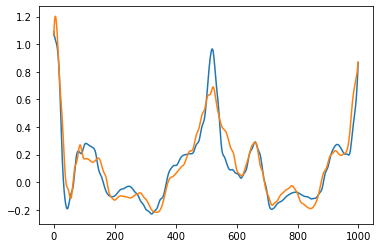

In [11]:
plt.plot(np.array(X_ts[0:2]).T)


(2491, 1000) (2491,)
(591, 1000) (591,)


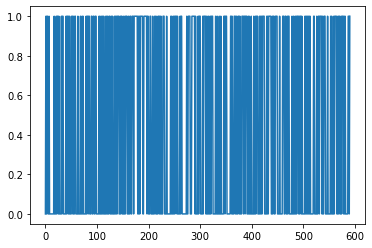

In [12]:
random_state = check_random_state(0)
permutation = random_state.permutation(np.array(X_t).shape[0])
X_tf = np.array(X_t)[permutation]
y_tf = np.array(y_t)[permutation]

permutation = random_state.permutation(np.array(X_ts).shape[0])
X_tsf = np.array(X_ts)[permutation]
y_tsf = np.array(y_ts)[permutation]

print(np.shape(X_tf), np.shape(y_tf))
print(np.shape(X_tsf), np.shape(y_tsf))
plt.plot(y_tsf)

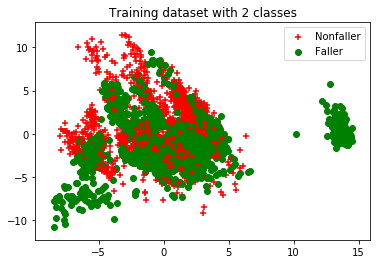

array([0.22546327, 0.15149028])

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_tf)
pca_2d = pca.transform(X_tf)


import pylab as pl
for i in range(0, pca_2d.shape[0]):
    if y_tf[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    marker='+')
    elif y_tf[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',    marker='o')

        
pl.legend([c1, c2], ['Nonfaller', 'Faller'])
pl.title('Training dataset with 2 classes')
pl.show()

pca.explained_variance_ratio_

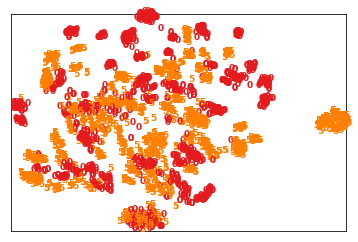

In [14]:
## Function to Scale and visualize the embedding vectors

def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)     
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
        
from sklearn import manifold
#降维
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)

X_tsne = tsne.fit_transform(X_tf)
#绘图
plot_embedding(X_tsne,y_tf*5)
plt.show()

In [ ]:
# Authors: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2011

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)
X = X_tf
y = y_tf*5
# ----------------------------------------------------------------------
# Scale and visualize the embedding vectors


# ----------------------------------------------------------------------
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, y, "Random Projection of the digits")


#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")

X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca, y,
               "Principal Components projection of the digits" )

# ----------------------------------------------------------------------
# Projection on to the first 2 linear discriminant components
'''
print("Computing Linear Discriminant Analysis projection")
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible

X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X2, y)
plot_embedding(X_lda, y,
               "Linear Discriminant projection of the digits")
'''
n_neighbors = 30

# ----------------------------------------------------------------------
# Isomap projection of the digits dataset
print("Computing Isomap projection")

X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
print("Done.")
plot_embedding(X_iso, y,
               "Isomap projection of the digits")


# ----------------------------------------------------------------------
# Locally linear embedding of the digits dataset
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='standard')

X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_lle, y,
               "Locally Linear Embedding of the digits")


# ----------------------------------------------------------------------
# Modified Locally linear embedding of the digits dataset
'''

print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='modified')

X_mlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_mlle, y,
               "Modified Locally Linear Embedding of the digits")
'''

# ----------------------------------------------------------------------
# HLLE embedding of the digits dataset
'''

print("Computing Hessian LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='hessian')

X_hlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_hlle, y,
               "Hessian Locally Linear Embedding of the digits")
'''

# ----------------------------------------------------------------------
# LTSA embedding of the digits dataset
'''
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='ltsa')

X_ltsa = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_ltsa, y,
               "Local Tangent Space Alignment of the digits")
'''
# ----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)

X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds, y,
               "MDS embedding of the digits")

# ----------------------------------------------------------------------
# Random Trees embedding of the digits dataset
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding(X_reduced, y,
               "Random forest embedding of the digits")

# ----------------------------------------------------------------------
# Spectral embedding of the digits dataset
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
X_se = embedder.fit_transform(X)

plot_embedding(X_se, y,
               "Spectral embedding of the digits")

# ----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)

X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne, y,
               "t-SNE embedding of the digits")

# ----------------------------------------------------------------------
# NCA projection of the digits dataset
print("Computing NCA projection")
nca = neighbors.NeighborhoodComponentsAnalysis(n_components=2, random_state=0)

X_nca = nca.fit_transform(X, y)

plot_embedding(X_nca, y,
               "NCA embedding of the digits")

plt.show()

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=500).fit(X_tf)
X_tf_pca = pca.transform(X_tf)
X_tsf_pca = pca.transform(X_tsf)


param_C = 5
param_gamma = 0.05

classifier = svm.SVC(C=param_C,gamma=param_gamma,tol=0.001)
#classifier = svm.LinearSVC(C=param_C)

#We learn the digits on train part
start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))
classifier.fit(X_tf_pca, y_tf)
end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

expected = y_tsf
predicted = classifier.predict(X_tsf_pca)
print(expected)
print(predicted)

      
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))



Start learning at 2019-11-08 13:16:09.484584
Stop learning 2019-11-08 13:16:12.383684
Elapsed learning 0:00:02.899100
[0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0
 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0
 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0
 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1
 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0
 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 

In [16]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_tf, y_tf)

expected = y_tsf
predicted = rnd_clf.predict(X_tsf)
print(expected)
print(predicted)

cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))


[0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0
 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0
 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0
 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1
 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0
 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1
 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0
 1 0 0 1 0 1 0 1 1 1 0 1 